In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

def generate_large_dataset(num_rows=100000):
    """
    Generates a synthetic sales dataset for the last 3 years.

    Args:
        num_rows (int): The number of rows of data to generate.
    """
    print(f"Generating {num_rows} rows of data... This may take a moment.")

    # 1. Setup Date Range (3 Years)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * 3)

    # Generate random dates efficiently
    date_range_days = (end_date - start_date).days
    random_days = np.random.randint(0, date_range_days, num_rows)

    # Create base dates array
    dates = []
    # We use a base timestamp to add the random days to
    start_ts = start_date.timestamp()
    # Vectorized date generation is harder with pure datetime,
    # so we generate random integers and convert to datetime objects roughly
    # For speed in pandas, we can just create a range and sample, but random integers is faster for huge sets

    # Faster date generation approach for massive data
    date_array = np.array([start_date + timedelta(days=int(day)) for day in random_days])

    # 2. Define Products and Categories
    # Structure: Category -> [(Product Name, Base Cost Range Min, Base Cost Range Max)]
    catalog = {
        'Clothing': [
            ('Denim Jeans', 20, 60), ('Cotton T-Shirt', 10, 30),
            ('Leather Jacket', 80, 200), ('Running Shoes', 40, 120),
            ('Formal Shirt', 30, 80), ('Winter Scarf', 15, 40)
        ]
    }

    # Flatten the catalog for random selection
    flat_products = []
    for cat, products in catalog.items():
        for prod_name, min_cost, max_cost in products:
            flat_products.append({
                'Category': cat,
                'Product Name': prod_name,
                'Min_Cost': min_cost,
                'Max_Cost': max_cost
            })

    products_df = pd.DataFrame(flat_products)

    # 3. Randomly Assign Products to Rows
    # We generate random indices to select products
    product_indices = np.random.randint(0, len(products_df), num_rows)
    selected_products = products_df.iloc[product_indices].reset_index(drop=True)

    # 4. Generate Numeric Data
    # Quantity Sold: Weighted towards lower numbers (1-5 common, 6-50 rare)
    quantity_sold = np.random.choice(np.arange(1, 51), num_rows, p=[0.1]*5 + [0.5/45]*45)

    # Stock Level and Production
    stock_levels = np.random.randint(0, 1000, num_rows)
    production_qty = np.random.randint(100, 2000, num_rows)
    delivery_time = np.random.randint(1, 15, num_rows) # Days

    # Regions and Customers
    regions = ['North America', 'Europe', 'Asia Pacific', 'Latin America', 'Middle East']
    region_col = np.random.choice(regions, num_rows)

    # Generate fake customer IDs
    customer_ids = np.random.randint(1000, 5000, num_rows)
    customers = [f"CUST-{cid}" for cid in customer_ids]

    # 5. Calculate Financials (Vectorized for Speed)
    # Base Cost (Randomized between min and max for that product)
    min_costs = selected_products['Min_Cost'].values
    max_costs = selected_products['Max_Cost'].values

    # Generate a random factor between 0 and 1
    random_factors = np.random.rand(num_rows)
    unit_costs = min_costs + (max_costs - min_costs) * random_factors

    # Add a profit margin (e.g., between 20% and 60% markup)
    margins = np.random.uniform(1.2, 1.6, num_rows)
    unit_prices = unit_costs * margins

    # Rounding for neatness
    unit_costs = np.round(unit_costs, 2)
    unit_prices = np.round(unit_prices, 2)

    # Total Calculations
    total_cost = unit_costs * quantity_sold
    total_sales = unit_prices * quantity_sold
    total_profit = total_sales - total_cost

    # 6. Assemble DataFrame
    df = pd.DataFrame({
        'Date': [d.strftime('%d/%m/%Y') for d in date_array],
        'Month': [d.strftime('%B') for d in date_array], # Extract Month Name
        'Product Name': selected_products['Product Name'],
        'Category': selected_products['Category'],
        'Quantity Sold': quantity_sold,
        'Sale Amount': np.round(total_sales, 2),
        'Cost': np.round(total_cost, 2),
        'Profit': np.round(total_profit, 2),
        'Customer': customers,
        'Region': region_col,
        'Stock Level': stock_levels,
        'Production Quantity': production_qty,
        'Delivery Time (Days)': delivery_time
    })

    # Sort by Date for realism
    df = df.sort_values('Date').reset_index(drop=True)

    print("Data generation complete. Saving to CSV...")

    # Save to CSV
    filename = 'sales_data_3years.csv'
    df.to_csv(filename, index=False)

    print(f"Successfully created '{filename}' with {num_rows} rows.")
    print(df.head())

if __name__ == "__main__":
    # You can change this number to 1000000 (1 million) for a very large dataset
    # Defaulting to 50,000 for quick demonstration
    generate_large_dataset(num_rows=50000)

Generating 50000 rows of data... This may take a moment.
Data generation complete. Saving to CSV...
Successfully created 'sales_data_3years.csv' with 50000 rows.
         Date    Month  Product Name  Category  Quantity Sold  Sale Amount  \
0  01/01/2023  January  Formal Shirt  Clothing             25      1443.75   
1  01/01/2023  January  Formal Shirt  Clothing             19      1620.13   
2  01/01/2023  January   Denim Jeans  Clothing              1        29.85   
3  01/01/2023  January  Winter Scarf  Clothing             47      1767.67   
4  01/01/2023  January   Denim Jeans  Clothing             27      2308.50   

      Cost  Profit   Customer         Region  Stock Level  \
0   999.25  444.50  CUST-4553  North America          446   
1  1216.00  404.13  CUST-1459   Asia Pacific          447   
2    21.75    8.10  CUST-4024         Europe          515   
3  1358.30  409.37  CUST-1587         Europe           94   
4  1603.53  704.97  CUST-1403   Asia Pacific          933   

  

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows and info to understand the structure
print(df.head())
print(df.info())
print(df['Category'].unique())
print(df['Product Name'].unique())
print(df['Month'].unique())

         Date    Month  Product Name  Category  Quantity Sold  Sale Amount  \
0  01/01/2023  January  Formal Shirt  Clothing             25      1443.75   
1  01/01/2023  January  Formal Shirt  Clothing             19      1620.13   
2  01/01/2023  January   Denim Jeans  Clothing              1        29.85   
3  01/01/2023  January  Winter Scarf  Clothing             47      1767.67   
4  01/01/2023  January   Denim Jeans  Clothing             27      2308.50   

      Cost  Profit   Customer         Region  Stock Level  \
0   999.25  444.50  CUST-4553  North America          446   
1  1216.00  404.13  CUST-1459   Asia Pacific          447   
2    21.75    8.10  CUST-4024         Europe          515   
3  1358.30  409.37  CUST-1587         Europe           94   
4  1603.53  704.97  CUST-1403   Asia Pacific          933   

   Production Quantity  Delivery Time (Days)  
0                  802                     9  
1                  920                     4  
2                 1086 

In [14]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
print(df['Year'].unique())

# Check aggregated counts
grouped = df.groupby(['Year', 'Month', 'Product Name'])['Production Quantity'].sum().reset_index()
print(grouped.head())
print(f"Data points for aggregated model: {len(grouped)}")

[2023 2024 2025 2022]
   Year     Month    Product Name  Production Quantity
0  2022  December  Cotton T-Shirt               272581
1  2022  December     Denim Jeans               283258
2  2022  December    Formal Shirt               256564
3  2022  December  Leather Jacket               264591
4  2022  December   Running Shoes               217880
Data points for aggregated model: 222


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
import numpy as np

# 1. Load Data
df = pd.read_csv('data.csv') # Assuming this is the correct CSV name based on the first cell

# 2. Preprocessing
# Convert Date to datetime to extract Year (for aggregation)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format from %d-%m-%Y to %d/%m/%Y
df['Year'] = df['Date'].dt.year

# Aggregate Data: Sum of Production Quantity per Month, Year, Product
# We want the total monthly production target.
data_agg = df.groupby(['Year', 'Month', 'Product Name'])['Production Quantity'].sum().reset_index()

# Feature Engineering
# Map Months to numbers 1-12 for better ordinal representation
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data_agg['Month_Num'] = data_agg['Month'].map(month_map)

# Encode Product Name
product_encoder = LabelEncoder()
data_agg['Product_Encoded'] = product_encoder.fit_transform(data_agg['Product Name'])

# Define Features (X) and Target (y)
# We use Month_Num and Product_Encoded to predict Production Quantity.
# Note: We do NOT include Year in X, because we want a general model for any year given a month.
# The model will learn the average 'seasonality' of production.
X = data_agg[['Month_Num', 'Product_Encoded']]
y = data_agg['Production Quantity']

# 3. Model Training
# Random Forest is robust and handles non-linearities well.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 4. Save Model and Artifacts
# We need to save the model, the product encoder, and the month map (conceptually, or just code it)
artifacts = {
    'model': model,
    'product_encoder': product_encoder,
    'month_map': month_map
}
joblib.dump(artifacts, 'clothing_production_model.joblib')

# 5. Prediction Function (Simulation for verification)
def predict_production(month_name):
    # Check if month exists
    if month_name not in month_map:
        return "Invalid Month"

    month_num = month_map[month_name]
    products = product_encoder.classes_

    # Create input dataframe for all products for this month
    inputs = pd.DataFrame({
        'Month_Num': [month_num] * len(products),
        'Product_Encoded': product_encoder.transform(products)
    })

    # Predict
    predictions = model.predict(inputs)

    # Format result
    results = pd.DataFrame({
        'Product Name': products,
        'Suggested Production Quantity': predictions.astype(int)
    })

    return results

# Test with "November"
test_pred = predict_production('November')
print(test_pred)

     Product Name  Suggested Production Quantity
0  Cotton T-Shirt                         170546
1     Denim Jeans                         174719
2    Formal Shirt                         182830
3  Leather Jacket                         180293
4   Running Shoes                         178998
5    Winter Scarf                         167783


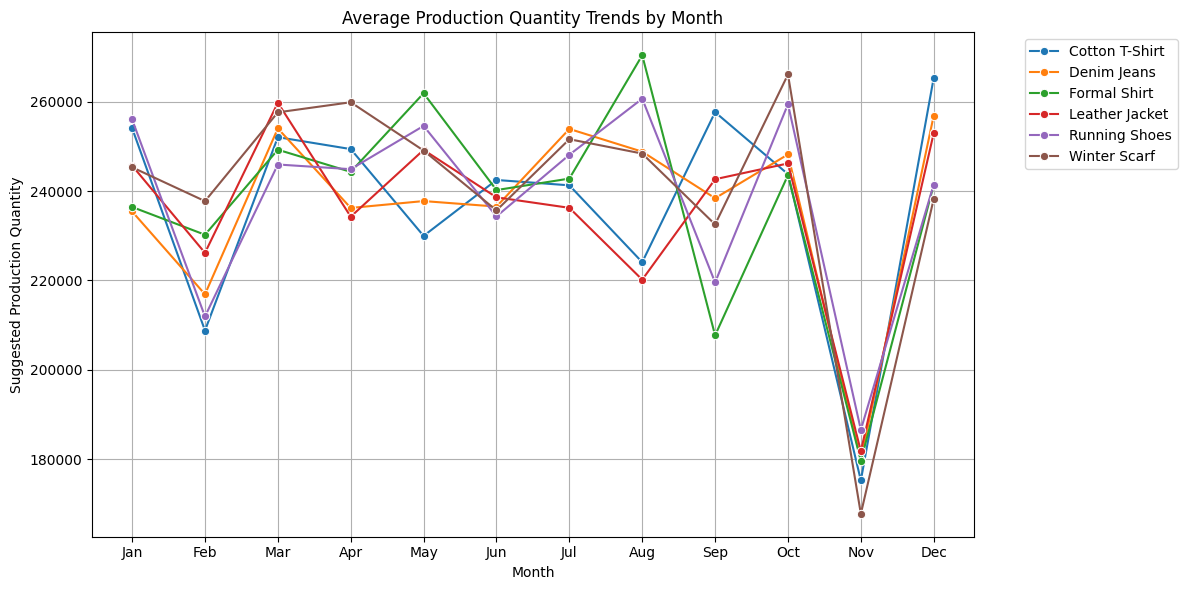

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-using data_agg from previous step
# Aggregate across years to get average monthly behavior for visualization
avg_monthly = data_agg.groupby(['Month_Num', 'Product Name'])['Production Quantity'].mean().reset_index()

# Map month num back to names for plotting
inv_map = {v: k for k, v in month_map.items()}
avg_monthly['Month'] = avg_monthly['Month_Num'].map(inv_map)

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_monthly, x='Month_Num', y='Production Quantity', hue='Product Name', marker='o')
plt.xticks(ticks=range(1, 13), labels=[inv_map[i][:3] for i in range(1, 13)])
plt.title('Average Production Quantity Trends by Month')
plt.ylabel('Suggested Production Quantity')
plt.xlabel('Month')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('seasonality_trends.png')

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib

def train_and_save_model(file_path='data.csv'): # Updated file_path default
    # --- 1. Load Data ---
    print("Loading data...")
    df = pd.read_csv(file_path)

    # --- 2. Preprocessing ---
    # Convert Date to datetime to handle yearly data if needed
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to match 'DD/MM/YYYY'
    df['Year'] = df['Date'].dt.year

    # Aggregate Data: We want the TOTAL production quantity per month/product
    # This groups all historical data (e.g., Jan 2023, Jan 2024) to find the trend.
    print("Aggregating monthly production trends...")
    data_agg = df.groupby(['Year', 'Month', 'Product Name'])['Production Quantity'].sum().reset_index()

    # --- 3. Feature Engineering ---
    # Map Month names to numbers (1-12) to help the model understand order
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    data_agg['Month_Num'] = data_agg['Month'].map(month_map)

    # Encode Product Names into numbers
    product_encoder = LabelEncoder()
    data_agg['Product_Encoded'] = product_encoder.fit_transform(data_agg['Product Name'])

    # Features (X): Month and Product
    # Target (y): Total Production Quantity
    X = data_agg[['Month_Num', 'Product_Encoded']]
    y = data_agg['Production Quantity']

    # --- 4. Train Model ---
    print("Training Random Forest Model...")
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # --- 5. Save Model & Artifacts ---
    # We save the model, encoder, and map so we can use them later
    artifacts = {
        'model': model,
        'product_encoder': product_encoder,
        'month_map': month_map
    }
    joblib.dump(artifacts, 'clothing_production_model.joblib')
    print("Model saved as 'clothing_production_model.joblib'")

# --- Inference Function (How to use the model) ---
def get_production_suggestion(month_name):
    # Load the saved model artifacts
    try:
        artifacts = joblib.load('clothing_production_model.joblib')
    except FileNotFoundError:
        return "Model file not found. Please train the model first."

    model = artifacts['model']
    product_encoder = artifacts['product_encoder']
    month_map = artifacts['month_map']

    # Validate Input
    month_name = month_name.capitalize() # Ensure "november" becomes "November"
    if month_name not in month_map:
        return f"Error: '{month_name}' is not a valid month. Please use full English month names."

    month_num = month_map[month_name]

    # Prepare input for ALL products for the given month
    all_products = product_encoder.classes_
    input_data = pd.DataFrame({
        'Month_Num': [month_num] * len(all_products),
        'Product_Encoded': product_encoder.transform(all_products)
    })

    # Make Predictions
    predictions = model.predict(input_data)

    # Format Output
    suggestions = pd.DataFrame({
        'Product Name': all_products,
        'Suggested Production Quantity': predictions.astype(int)
    })

    # Sort by quantity for better visibility
    suggestions = suggestions.sort_values(by='Suggested Production Quantity', ascending=False)

    return suggestions

# ==========================================
# EXECUTION SECTION
# ==========================================
if __name__ == "__main__":
    # 1. Train the model (Run this once)
    train_and_save_model('data.csv') # Updated filename here as well

    # 2. Example Usage: User inputs "November"
    user_month = "March"
    print(f"\n--- Production Suggestions for {user_month} ---")
    result = get_production_suggestion(user_month)
    print(result)

Loading data...
Aggregating monthly production trends...
Training Random Forest Model...
Model saved as 'clothing_production_model.joblib'

--- Production Suggestions for March ---
     Product Name  Suggested Production Quantity
3  Leather Jacket                         258573
5    Winter Scarf                         257333
1     Denim Jeans                         253189
0  Cotton T-Shirt                         250722
2    Formal Shirt                         249883
4   Running Shoes                         246221
